In [1]:
import os
import os
import glob
import obspy
import time
from obspy.taup import TauPyModel
from obspy.clients.iris import Client
client = Client()
import matplotlib.pyplot as plt
import numpy as np
from obspy.signal.trigger import classic_sta_lta
from IPython.display import clear_output
data_sac="./Download/SAC"
evt = iter(os.listdir(data_sac))
print(next(evt))

20220102001614080


In [ ]:
#  refine P-wave arrival and calculate theoretical sP-P differential time
import os
import glob
import obspy
import time
from obspy.taup import TauPyModel
from obspy.clients.iris import Client
client = Client()
import matplotlib.pyplot as plt
import numpy as np
from obspy.signal.trigger import classic_sta_lta
from IPython.display import clear_output
switch1 = True
switch2 = True

data_sac="./Download/SAC"
file = open("./judge.info", "w")
file.close()
file2 = open("./progression.info", "r")

overall_progress = file2.read().split()
evt = overall_progress[1]
sacfile_name = overall_progress[0]


file2.close()
total = len(os.listdir(data_sac))
events = os.listdir(data_sac)
for ev in events:
        print(ev)
        if ev != evt and switch1 == True:
            print(switch1)
            print(ev != evt)
            print("no")
            continue
        switch1 = False
        print(ev)
                
        
        
        
        inpath = os.path.join(data_sac, ev)
        if len(glob.glob(f"{inpath}/*R.SAC.bp.cut")) == 0:
            continue
        else:            
            funiq = []
            for sac in glob.glob(f"{inpath}/*R.SAC.bp.cut"):
                st = obspy.read(sac)
                funiq.append("{}.{}.{}".format(st[0].stats.network,st[0].stats.station,st[0].stats.location))
            fU = sorted(set(funiq))
            subTotal = len(fU)
            #subProgress = 0
            for sacfile in fU:
                iteration2 = iter(fU)
                #print("sacfile", sacfile)
                #print("sac", sac)
                if switch2 == True and sacfile != sacfile_name:
                    continue
                switch2 = False
                        
                progress = [fU.index(sacfile), len(fU), events.index(ev), len(events), sacfile, ev]
                print("progress:", progress)
                file2 = open("./progression.info", "w")
                file2.write(f" {sacfile} {ev}")
                file2.close()
                
                st = obspy.read(f"{inpath}/{sacfile}*[RTZ].SAC.bp.cut")
                #print(st,sachd["evdp"],sachd["dist"])

                ### refine P-wave arrival using sta/lta method
                df = st[0].stats.sac.delta
                t = np.arange(st[0].stats.sac.t1-5, st[0].stats.sac.t1+10, st[0].stats.delta)
                # time window
                idx1 = int((st[0].stats.sac.t1-5-st[0].stats.sac.b)/st[0].stats.delta)
                idx2 = int((st[0].stats.sac.t1+10-st[0].stats.sac.b)/st[0].stats.delta)
                cft = classic_sta_lta(st[2].data[idx1:idx2], int(0.5/df), int(3/df))   # 0.5s short-term window; 3.0s long-term window
                if len(np.where(cft>5)[0]) != 0:
                    Tp = -5 + np.where(cft>5)[0][0]*df + 0.25 - st[0].stats.sac.o
                else:
                    Tp = 0 - st[0].stats.sac.o

                ### calculate the theoretical sP-P differential time
                model = TauPyModel(model="iasp91")
                sachd = st[0].stats.sac
                distaz = client.distaz(sachd["stla"], sachd["stlo"], sachd["evla"], sachd["evlo"])
                gcarc = distaz['distance']
                arrival = model.get_travel_times(source_depth_in_km=sachd["evdp"],distance_in_degree=gcarc, phase_list=["sPvmP"])
                TsPmP = arrival[0].time
                arrival = model.get_travel_times(source_depth_in_km=sachd["evdp"],distance_in_degree=gcarc, phase_list=["sPn"])
                if len(arrival) != 0:
                    TsPn = float("{:.3f}".format(arrival[0].time))
                else:
                    TsPn = "nan"
                print("TP={:.3f}s  TsPmP={:.3f}s  TsPn={}s".format(Tp,TsPmP,TsPn))

                ### Plot the waveform
                plt.figure(figsize=(25,6))
                plt.subplot(211)
                plt.plot(t,st[2].data[idx1:idx2],color="black")
                plt.axvline(x=st[2].stats.sac.t1, color="red", alpha=0.5, linewidth=2,label="Predicted")
                if len(np.where(cft>5)[0]) != 0:
                    plt.axvline(x=-5+np.where(cft>5)[0][0]*df+0.25, color="blue", alpha=0.5, linewidth=2,label="Refined")
                plt.axvline(x=TsPmP-Tp, color="green", alpha=0.5, linewidth=2, label="sPmP")
                if TsPn != "nan":
                    plt.axvline(x=TsPn-Tp, color="cyan", alpha=0.5, linewidth=2, label="sPn")
                plt.legend()

                plt.subplot(212)
                plt.plot(t,cft,color="red")
                plt.axhline(y=5, color='blue', linestyle='--')
                plt.xlabel("Time (s)",fontsize=15)
                plt.show()
                quality = input("Quality: y(good) or n(bad)")
                
                if quality == "y":
                    file = open("./judge.info", "a")
                    file.write("Info: {} {} Tp: {} TsPmP: {} TsPn: {}\n".format(ev, sacfile, Tp, TsPmP, TsPn))
                    file.close()
                clear_output(wait=True)
                


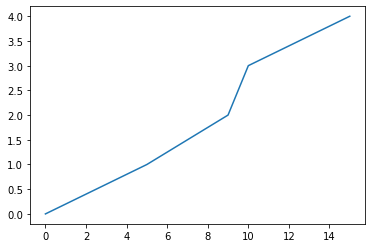

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = [0,5,9,10,15]
y = [0,1,2,3,4]
plt.plot(x,y)
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.show()

In [3]:
import jupyterthemes as jt
    
    
    
!jt -t chesterish

In [4]:

list1 = []
list1[0] = 3

IndexError: list assignment index out of range

In [28]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.clients.fdsn.mass_downloader import RectangularDomain, Restrictions, MassDownloader
import csv
import os
import obspy
from obspy import UTCDateTime
import obspy
from obspy.io.sac import SACTrace
from obspy.taup import TauPyModel
from obspy import read_inventory
from obspy.clients.iris import Client
client = Client()
import os
import glob 
from IPython.display import display, clear_output
import re

In [3]:
def read_evt(evtf):
    """
    read event information
    """
    with open(evtf, 'r') as f:
        lines = f.readlines()[1:]
        events = []
        dnames = []
        for line in lines:
            line = line.strip()
            temp = line.split(',')
            t = UTCDateTime(temp[0])
            lat, lon = float(temp[1]), float(temp[2])
            depth = float(temp[3])
            dpu = temp[4]
            mag = float(temp[5])
            magt = temp[6]
            events.append([t, lat, lon, depth, dpu, mag, magt])
            dnames.append("".join(temp[0].split("T")[0].split("-")) + "".join("".join("".join(temp[0].split("T")[1].split("Z")).split(".")).split(":")))
        return dnames, events

In [22]:
stas = read_inventory(f"./Download/stations/AZ.BZN.xml")
num_channels = len(stas[0][0])
print(num_channels, ": ", stas[0][0])
#the ZNE channels: (Z-Vertical, N-North-South, E-East-West)

3 :  Station BZN (Buzz Northerns Place, Anza, CA, USA)
	Station Code: BZN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.49, Longitude: -116.67, Elevation: 1301.0 m
	Available Channels:
		BZN..BHZ, BZN..BHN, BZN..BHE


In [26]:
wdir = './'
data_mseed = f'{wdir}/Download/miniseed' 
data_staxml = f'{wdir}/Download/stations'

evt_lst = f'{wdir}/events.csv'
dnames, events = read_evt(evt_lst)
for evt in zip(dnames, events):
    fpath = os.path.join(data_mseed, evt[0], '*.mseed')
    st = obspy.read(fpath)
    for tr in st:
        outfile = "{}.{}".format(tr.stats.network,tr.stats.station)


                #stas is the station information
        try:
            stas = read_inventory(f"{data_staxml}/{outfile}.xml")
            num_channels = len(stas[0][0])
            #print(num_channels, ": ", stas[0][0].channels)
            if num_channels != 3:
                print(stas[0][0])
        except: 
            print(f"{data_staxml}/{outfile}.xml not found")


Station AGO (Agoura)
	Station Code: AGO
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.15, Longitude: -118.77, Elevation: 259.0 m
	Available Channels:
		AGO..EHZ
.//Download/stations/CI.ALP.xml not found
.//Download/stations/CI.ALP.xml not found
.//Download/stations/CI.ALP.xml not found
Station ASP (Allensworth State Park)
	Station Code: ASP
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.86, Longitude: -119.39, Elevation: 64.0 m
	Available Channels:
		ASP..EHZ
Station AVC (Avalon Canyon)
	Station Code: AVC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.33, Longitude: -118.34, Elevation: 0.0 m
	Available Channels:
		AVC..EHZ
Station BAC (Bachelor Mountain)
	Station Code: BAC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.0

Station GSA (525 S Wilson Basement, Pasadena)
	Station Code: GSA
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.14, Longitude: -118.13, Elevation: 234.0 m
	Available Channels:
		GSA..EHZ
Station GVR (Garvey)
	Station Code: GVR
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.05, Longitude: -118.12, Elevation: 141.0 m
	Available Channels:
		GVR..EHZ
Station HLN (Highland)
	Station Code: HLN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.12, Longitude: -117.22, Elevation: 358.9 m
	Available Channels:
		HLN..EHZ
Station IVY (Ivy Glen)
	Station Code: IVY
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.76, Longitude: -117.48, Elevation: 330.0 m
	Available Channels

Station SHU (Shuttle)
	Station Code: SHU
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.64, Longitude: -118.16, Elevation: 774.0 m
	Available Channels:
		SHU..EHZ
Station SIL (Silver Peak)
	Station Code: SIL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.35, Longitude: -116.83, Elevation: 1698.0 m
	Available Channels:
		SIL..EHZ
Station SMT (South Mountain)
	Station Code: SMT
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.33, Longitude: -119.01, Elevation: 683.0 m
	Available Channels:
		SMT..EHZ
Station SMV (Simi Valley)
	Station Code: SMV
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.27, Longitude: -118.74, Elevation: 276.0 m
	Available Channels:
		SMV..

Station CSL (Castaic Lake aka  LACoFD Station 149)
	Station Code: CSL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.50, Longitude: -118.62, Elevation: 353.9 m
	Available Channels:
		CSL..EHZ
Station CVW (Castaic Valley West)
	Station Code: CVW
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.92, Longitude: -118.94, Elevation: 804.8 m
	Available Channels:
		CVW..EHZ
Station EMS (East Mesa)
	Station Code: EMS
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 32.74, Longitude: -114.99, Elevation: 11.0 m
	Available Channels:
		EMS..EHZ
Station EOC (Emergency Office Center)
	Station Code: EOC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.45, Longitude: -119.77, Eleva

Station TEJ (El Tejon)
	Station Code: TEJ
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.23, Longitude: -118.69, Elevation: 650.0 m
	Available Channels:
		TEJ..EHZ
Station THC (Tehachapi)
	Station Code: THC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.91, Longitude: -118.66, Elevation: 1688.0 m
	Available Channels:
		THC..EHZ
Station TJR (Tejon Ranch)
	Station Code: TJR
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.03, Longitude: -118.74, Elevation: 398.0 m
	Available Channels:
		TJR..EHZ
Station VCP (Valley Center-Pauma Unified School District)
	Station Code: VCP
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.24, Longitude: -117.02, Elevation: 426.9 m


Station GCC (Gold Creek Center)
	Station Code: GCC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.33, Longitude: -118.32, Elevation: 726.6 m
	Available Channels:
		GCC..EHZ
Station GFF (Goffs)
	Station Code: GFF
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.92, Longitude: -115.07, Elevation: 791.1 m
	Available Channels:
		GFF..EHZ
Station GSA (525 S Wilson Basement, Pasadena)
	Station Code: GSA
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.14, Longitude: -118.13, Elevation: 234.0 m
	Available Channels:
		GSA..EHZ
Station HLN (Highland)
	Station Code: HLN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.12, Longitude: -117.22, Elevation: 358.9 m
	Available 

Station AGO (Agoura)
	Station Code: AGO
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.15, Longitude: -118.77, Elevation: 259.0 m
	Available Channels:
		AGO..EHZ
Station ASP (Allensworth State Park)
	Station Code: ASP
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.86, Longitude: -119.39, Elevation: 64.0 m
	Available Channels:
		ASP..EHZ
Station AVC (Avalon Canyon)
	Station Code: AVC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.33, Longitude: -118.34, Elevation: 0.0 m
	Available Channels:
		AVC..EHZ
Station BAC (Bachelor Mountain)
	Station Code: BAC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.61, Longitude: -117.04, Elevation: 551.0 m
	Available Channe

Station RMM (Rodman Mountain)
	Station Code: RMM
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.64, Longitude: -116.62, Elevation: 1777.0 m
	Available Channels:
		RMM..EHZ
Station SAL (Salton City)
	Station Code: SAL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.28, Longitude: -115.99, Elevation: 14.0 m
	Available Channels:
		SAL..EHZ
Station SAN (Santa Ana)
	Station Code: SAN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.70, Longitude: -117.89, Elevation: 11.0 m
	Available Channels:
		SAN..EHZ
Station SIL (Silver Peak)
	Station Code: SIL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.35, Longitude: -116.83, Elevation: 1698.0 m
	Available Channels:
		SIL

Station EMS (East Mesa)
	Station Code: EMS
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 32.74, Longitude: -114.99, Elevation: 11.0 m
	Available Channels:
		EMS..EHZ
Station EOC (Emergency Office Center)
	Station Code: EOC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.45, Longitude: -119.77, Elevation: 75.0 m
	Available Channels:
		EOC..EHZ
Station EOC (Emergency Office Center)
	Station Code: EOC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.45, Longitude: -119.77, Elevation: 75.0 m
	Available Channels:
		EOC..EHZ
Station EOC (Emergency Office Center)
	Station Code: EOC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.45, Longitude: -119.77, Elevation: 75.0 

Station WNM (Nine Mile Canyon)
	Station Code: WNM
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.84, Longitude: -117.91, Elevation: 974.3 m
	Available Channels:
		WNM..EHZ
Station WVP2 (Volcano Peak 2)
	Station Code: WVP2
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.95, Longitude: -117.82, Elevation: 1465.0 m
	Available Channels:
		WVP2..EHZ
Station WWF (Wister Waterfowl)
	Station Code: WWF
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.28, Longitude: -115.58, Elevation: -61.0 m
	Available Channels:
		WWF..EHZ
Station YUC (Yucca Valley)
	Station Code: YUC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.20, Longitude: -116.41, Elevation: 1077.0 m
	Availabl

Station MTA (Margarita Mountains)
	Station Code: MTA
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.43, Longitude: -117.38, Elevation: 785.0 m
	Available Channels:
		MTA..EHZ
Station NOT (Northridge)
	Station Code: NOT
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.23, Longitude: -118.56, Elevation: 247.5 m
	Available Channels:
		NOT..EHZ
Station NPN (Nipton)
	Station Code: NPN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.47, Longitude: -115.27, Elevation: 935.1 m
	Available Channels:
		NPN..EHZ
Station PDW (Prado Wetlands)
	Station Code: PDW
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.92, Longitude: -117.62, Elevation: 166.0 m
	Available Channels:
		

Station CSL (Castaic Lake aka  LACoFD Station 149)
	Station Code: CSL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.50, Longitude: -118.62, Elevation: 353.9 m
	Available Channels:
		CSL..EHZ
.//Download/stations/CI.CTC.xml not found
.//Download/stations/CI.CTC.xml not found
.//Download/stations/CI.CTC.xml not found
Station CVW (Castaic Valley West)
	Station Code: CVW
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.92, Longitude: -118.94, Elevation: 804.8 m
	Available Channels:
		CVW..EHZ
.//Download/stations/CI.CZN.xml not found
.//Download/stations/CI.CZN.xml not found
.//Download/stations/CI.CZN.xml not found
Station DTC (Del Valle - LACoFD Regional Training Center)
	Station Code: DTC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.42, L

Station SSS (Stringfellow Superfund Site Jurupa Mountains)
	Station Code: SSS
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.03, Longitude: -117.45, Elevation: 337.1 m
	Available Channels:
		SSS..EHZ
Station TEJ (El Tejon)
	Station Code: TEJ
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.23, Longitude: -118.69, Elevation: 650.0 m
	Available Channels:
		TEJ..EHZ
Station THC (Tehachapi)
	Station Code: THC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.91, Longitude: -118.66, Elevation: 1688.0 m
	Available Channels:
		THC..EHZ
Station TJR (Tejon Ranch)
	Station Code: TJR
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.03, Longitude: -118.74, Elevation: 398.0 m

Station GCC (Gold Creek Center)
	Station Code: GCC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.33, Longitude: -118.32, Elevation: 726.6 m
	Available Channels:
		GCC..EHZ
Station GFF (Goffs)
	Station Code: GFF
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.92, Longitude: -115.07, Elevation: 791.1 m
	Available Channels:
		GFF..EHZ
Station GSA (525 S Wilson Basement, Pasadena)
	Station Code: GSA
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.14, Longitude: -118.13, Elevation: 234.0 m
	Available Channels:
		GSA..EHZ
Station HLN (Highland)
	Station Code: HLN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.12, Longitude: -117.22, Elevation: 358.9 m
	Available 

Station AGO (Agoura)
	Station Code: AGO
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.15, Longitude: -118.77, Elevation: 259.0 m
	Available Channels:
		AGO..EHZ
Station ASP (Allensworth State Park)
	Station Code: ASP
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.86, Longitude: -119.39, Elevation: 64.0 m
	Available Channels:
		ASP..EHZ
Station AVC (Avalon Canyon)
	Station Code: AVC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.33, Longitude: -118.34, Elevation: 0.0 m
	Available Channels:
		AVC..EHZ
Station BAC (Bachelor Mountain)
	Station Code: BAC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.61, Longitude: -117.04, Elevation: 551.0 m
	Available Channe

Station SAL (Salton City)
	Station Code: SAL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.28, Longitude: -115.99, Elevation: 14.0 m
	Available Channels:
		SAL..EHZ
Station SAN (Santa Ana)
	Station Code: SAN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.70, Longitude: -117.89, Elevation: 11.0 m
	Available Channels:
		SAN..EHZ
Station SHU (Shuttle)
	Station Code: SHU
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.64, Longitude: -118.16, Elevation: 774.0 m
	Available Channels:
		SHU..EHZ
Station SIL (Silver Peak)
	Station Code: SIL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.35, Longitude: -116.83, Elevation: 1698.0 m
	Available Channels:
		SIL..EHZ
Sta

Station EMS (East Mesa)
	Station Code: EMS
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 32.74, Longitude: -114.99, Elevation: 11.0 m
	Available Channels:
		EMS..EHZ
Station EOC (Emergency Office Center)
	Station Code: EOC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.45, Longitude: -119.77, Elevation: 75.0 m
	Available Channels:
		EOC..EHZ
Station EOC (Emergency Office Center)
	Station Code: EOC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.45, Longitude: -119.77, Elevation: 75.0 m
	Available Channels:
		EOC..EHZ
Station EOC (Emergency Office Center)
	Station Code: EOC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.45, Longitude: -119.77, Elevation: 75.0 

Station WNM (Nine Mile Canyon)
	Station Code: WNM
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.84, Longitude: -117.91, Elevation: 974.3 m
	Available Channels:
		WNM..EHZ
Station WRV2 (Rose Valley Canyon 2)
	Station Code: WRV2
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 36.01, Longitude: -117.89, Elevation: 1070.0 m
	Available Channels:
		WRV2..EHZ
Station WWF (Wister Waterfowl)
	Station Code: WWF
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.28, Longitude: -115.58, Elevation: -61.0 m
	Available Channels:
		WWF..EHZ
Station YUC (Yucca Valley)
	Station Code: YUC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.20, Longitude: -116.41, Elevation: 1077.0 m
	Av

Station MTA (Margarita Mountains)
	Station Code: MTA
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.43, Longitude: -117.38, Elevation: 785.0 m
	Available Channels:
		MTA..EHZ
Station NOT (Northridge)
	Station Code: NOT
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.23, Longitude: -118.56, Elevation: 247.5 m
	Available Channels:
		NOT..EHZ
Station NPN (Nipton)
	Station Code: NPN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.47, Longitude: -115.27, Elevation: 935.1 m
	Available Channels:
		NPN..EHZ
Station PDW (Prado Wetlands)
	Station Code: PDW
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.92, Longitude: -117.62, Elevation: 166.0 m
	Available Channels:
		

Station CAC (Caltech Athenaeum Cellar)
	Station Code: CAC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.14, Longitude: -118.12, Elevation: 230.0 m
	Available Channels:
		CAC..EHZ
Station CLO (Camarillo)
	Station Code: CLO
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.22, Longitude: -119.01, Elevation: 48.0 m
	Available Channels:
		CLO..EHZ
Station COK2 (Cook Ranch 2)
	Station Code: COK2
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 32.85, Longitude: -115.73, Elevation: -14.0 m
	Available Channels:
		COK2..EHZ
Station CPO (Campo Elementary School)
	Station Code: CPO
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 32.64, Longitude: -116.49, Elevation: 838.0 m
	A

Station SAL (Salton City)
	Station Code: SAL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.28, Longitude: -115.99, Elevation: 14.0 m
	Available Channels:
		SAL..EHZ
Station SAN (Santa Ana)
	Station Code: SAN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.70, Longitude: -117.89, Elevation: 11.0 m
	Available Channels:
		SAN..EHZ
Station SHU (Shuttle)
	Station Code: SHU
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.64, Longitude: -118.16, Elevation: 774.0 m
	Available Channels:
		SHU..EHZ
Station SIL (Silver Peak)
	Station Code: SIL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.35, Longitude: -116.83, Elevation: 1698.0 m
	Available Channels:
		SIL..EHZ
Sta

Station CSL (Castaic Lake aka  LACoFD Station 149)
	Station Code: CSL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.50, Longitude: -118.62, Elevation: 353.9 m
	Available Channels:
		CSL..EHZ
Station CVW (Castaic Valley West)
	Station Code: CVW
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.92, Longitude: -118.94, Elevation: 804.8 m
	Available Channels:
		CVW..EHZ
Station EMS (East Mesa)
	Station Code: EMS
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 32.74, Longitude: -114.99, Elevation: 11.0 m
	Available Channels:
		EMS..EHZ
Station EOC (Emergency Office Center)
	Station Code: EOC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.45, Longitude: -119.77, Eleva

Station TEJ (El Tejon)
	Station Code: TEJ
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.23, Longitude: -118.69, Elevation: 650.0 m
	Available Channels:
		TEJ..EHZ
Station THC (Tehachapi)
	Station Code: THC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.91, Longitude: -118.66, Elevation: 1688.0 m
	Available Channels:
		THC..EHZ
Station TJR (Tejon Ranch)
	Station Code: TJR
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.03, Longitude: -118.74, Elevation: 398.0 m
	Available Channels:
		TJR..EHZ
Station VCP (Valley Center-Pauma Unified School District)
	Station Code: VCP
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.24, Longitude: -117.02, Elevation: 426.9 m


Station FRM (Frazier Mountain)
	Station Code: FRM
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.78, Longitude: -118.97, Elevation: 2443.0 m
	Available Channels:
		FRM..EHZ
Station FUL (Fullerton)
	Station Code: FUL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.87, Longitude: -117.92, Elevation: 51.0 m
	Available Channels:
		FUL..EHZ
Station GCC (Gold Creek Center)
	Station Code: GCC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.33, Longitude: -118.32, Elevation: 726.6 m
	Available Channels:
		GCC..EHZ
Station GFF (Goffs)
	Station Code: GFF
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.92, Longitude: -115.07, Elevation: 791.1 m
	Available Channels:
		GF

Station 5062 (Salton Sea Wildlife (SSW))
	Station Code: 5062
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.18, Longitude: -115.62, Elevation: -64.0 m
	Available Channels:
		5062..EHZ
Station 5081 (5081, Woodland Hills, CA (TCF))
	Station Code: 5081
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.08, Longitude: -118.60, Elevation: 203.0 m
	Available Channels:
		5081..EHZ
Station 5403 (5403, Ojai, CA (OKV))
	Station Code: 5403
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.40, Longitude: -119.30, Elevation: 124.0 m
	Available Channels:
		5403..EHZ
Station 5442 (Oak Glen, Christian Center (OKGL))
	Station Code: 5442
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude:

Station MTA (Margarita Mountains)
	Station Code: MTA
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.43, Longitude: -117.38, Elevation: 785.0 m
	Available Channels:
		MTA..EHZ
Station NOT (Northridge)
	Station Code: NOT
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.23, Longitude: -118.56, Elevation: 247.5 m
	Available Channels:
		NOT..EHZ
Station NPN (Nipton)
	Station Code: NPN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.47, Longitude: -115.27, Elevation: 935.1 m
	Available Channels:
		NPN..EHZ
Station PDW (Prado Wetlands)
	Station Code: PDW
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.92, Longitude: -117.62, Elevation: 166.0 m
	Available Channels:
		

Station CVW (Castaic Valley West)
	Station Code: CVW
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.92, Longitude: -118.94, Elevation: 804.8 m
	Available Channels:
		CVW..EHZ
Station EMS (East Mesa)
	Station Code: EMS
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 32.74, Longitude: -114.99, Elevation: 11.0 m
	Available Channels:
		EMS..EHZ
Station EOC (Emergency Office Center)
	Station Code: EOC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.45, Longitude: -119.77, Elevation: 75.0 m
	Available Channels:
		EOC..EHZ
Station EOC (Emergency Office Center)
	Station Code: EOC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.45, Longitude: -119.77, Elevation: 75.0 m
	

Station SSS (Stringfellow Superfund Site Jurupa Mountains)
	Station Code: SSS
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.03, Longitude: -117.45, Elevation: 337.1 m
	Available Channels:
		SSS..EHZ
Station TEJ (El Tejon)
	Station Code: TEJ
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.23, Longitude: -118.69, Elevation: 650.0 m
	Available Channels:
		TEJ..EHZ
Station THC (Tehachapi)
	Station Code: THC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.91, Longitude: -118.66, Elevation: 1688.0 m
	Available Channels:
		THC..EHZ
Station TJR (Tejon Ranch)
	Station Code: TJR
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.03, Longitude: -118.74, Elevation: 398.0 m

Station GSA (525 S Wilson Basement, Pasadena)
	Station Code: GSA
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.14, Longitude: -118.13, Elevation: 234.0 m
	Available Channels:
		GSA..EHZ
Station HLN (Highland)
	Station Code: HLN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.12, Longitude: -117.22, Elevation: 358.9 m
	Available Channels:
		HLN..EHZ
Station KML (Kerckhoff Marine Laboratory)
	Station Code: KML
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.60, Longitude: -117.88, Elevation: 9.0 m
	Available Channels:
		KML..EHZ
Station LEO (Leona Valley)
	Station Code: LEO
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.63, Longitude: -118.31, Elevation: 1025

Station AGO (Agoura)
	Station Code: AGO
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.15, Longitude: -118.77, Elevation: 259.0 m
	Available Channels:
		AGO..EHZ
Station ASP (Allensworth State Park)
	Station Code: ASP
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.86, Longitude: -119.39, Elevation: 64.0 m
	Available Channels:
		ASP..EHZ
Station AVC (Avalon Canyon)
	Station Code: AVC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.33, Longitude: -118.34, Elevation: 0.0 m
	Available Channels:
		AVC..EHZ
Station BAC (Bachelor Mountain)
	Station Code: BAC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.61, Longitude: -117.04, Elevation: 551.0 m
	Available Channe

Station SAL (Salton City)
	Station Code: SAL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.28, Longitude: -115.99, Elevation: 14.0 m
	Available Channels:
		SAL..EHZ
Station SAN (Santa Ana)
	Station Code: SAN
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.70, Longitude: -117.89, Elevation: 11.0 m
	Available Channels:
		SAN..EHZ
Station SHU (Shuttle)
	Station Code: SHU
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.64, Longitude: -118.16, Elevation: 774.0 m
	Available Channels:
		SHU..EHZ
Station SIL (Silver Peak)
	Station Code: SIL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.35, Longitude: -116.83, Elevation: 1698.0 m
	Available Channels:
		SIL..EHZ
Sta

Station CSL (Castaic Lake aka  LACoFD Station 149)
	Station Code: CSL
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.50, Longitude: -118.62, Elevation: 353.9 m
	Available Channels:
		CSL..EHZ
Station CVW (Castaic Valley West)
	Station Code: CVW
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.92, Longitude: -118.94, Elevation: 804.8 m
	Available Channels:
		CVW..EHZ
Station EMS (East Mesa)
	Station Code: EMS
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 32.74, Longitude: -114.99, Elevation: 11.0 m
	Available Channels:
		EMS..EHZ
Station GCC (Gold Creek Center)
	Station Code: GCC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.33, Longitude: -118.32, Elevation: 

Station 5062 (Salton Sea Wildlife (SSW))
	Station Code: 5062
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.18, Longitude: -115.62, Elevation: -64.0 m
	Available Channels:
		5062..EHZ
Station 5081 (5081, Woodland Hills, CA (TCF))
	Station Code: 5081
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.08, Longitude: -118.60, Elevation: 203.0 m
	Available Channels:
		5081..EHZ
Station 5402 (NP.5402, Beverly Hills, previously CI.BVH)
	Station Code: 5402
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.08, Longitude: -118.40, Elevation: 39.0 m
	Available Channels:
		5402..EHZ
Station 5403 (5403, Ojai, CA (OKV))
	Station Code: 5403
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	La

Station LEO (Leona Valley)
	Station Code: LEO
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.63, Longitude: -118.31, Elevation: 1025.0 m
	Available Channels:
		LEO..EHZ
Station LVY (Levy)
	Station Code: LVY
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 34.17, Longitude: -119.16, Elevation: 11.8 m
	Available Channels:
		LVY..EHZ
Station MAG (Magundon)
	Station Code: MAG
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 35.36, Longitude: -118.92, Elevation: 135.0 m
	Available Channels:
		MAG..EHZ
Station MMC (Pacific Marine Mammal Center)
	Station Code: MMC
	Channel Count: None/None (Selected/Total)
	2022-01-01T00:00:00.000000Z - 2022-07-01T00:00:00.000000Z
	Access: None 
	Latitude: 33.57, Longitude: -117.76, Elevation: 55.1 m
	Available Channels:



KeyboardInterrupt



In [ ]:

#def mseed2sac(data_root, data_out, data_staxml, dnames, events):
    """
    convert miniseed to SAC
    """
total_run_num = len(events)
run_num = 0
for evt in zip(dnames, events):

    outd = os.path.join(data_out, evt[0])
    if os.path.exists(outd):
        continue
    else:
        os.makedirs(outd)

        fpath = os.path.join(data_root, evt[0], '*.mseed')
        try:
            #st is the mseed file
            st = obspy.read(fpath)
        except FileNotFoundError:
            print("Missing File: %s" % fpath)
            continue

        # get the staxml
        run_num += 1
        print(f"run {run_num} of {total_run_num}")
        for tr in st:
            outfile = "{}.{}".format(tr.stats.network,tr.stats.station)


            #stas is the station information
            stas = read_inventory(f"{data_staxml}/{outfile}.xml")

            num_channels = len(stas[0][0])
            print(num_channels)
            for i in range(num_channels):

                if (tr.stats.channel==stas[0][0][i].code):
                    stas[0][0][i].location_code = tr.stats.location
                    break
                    #print(stas[0][0][i].response)

            #print(tr)
#                 elif (tr.stats.channel==stas[0][0][1].code):
#                     stas[0][0][1].location_code = tr.stats.location
#                 else :
#                     stas[0][0][2].location_code = tr.stats.location

        # remove the response
            trace = tr.copy()
            #print(trace.start)
            #trace.remove_response(inventory=stas)
            try:
                trace.remove_response(inventory=stas)
            except:
                print(f"No matching response information found: {tr}")
                #print(f"trying to download station data)
                continue
            #trace.remove_response(inventory=stas) 
            #print("successful run")

        # convert to SACTrace from ObsPy Trace
            sactr = SACTrace.from_obspy_trace(trace)

        # set event origin time as SAC reference time
            sactr.reftime = evt[1][0]
            sactr.o = 0
            sactr.iztype = 'io'

        # set station location // network, station, channel
            sactr.stla = stas[0][0][0].latitude
            sactr.stlo = stas[0][0][0].longitude
            sactr.stel = stas[0][0][0].elevation

        # set event location and magnitude
            sactr.evla = evt[1][1]
            sactr.evlo = evt[1][2]
            sactr.evdp = evt[1][3]
            sactr.mag = evt[1][5]

        # set cmpaz and cmpinc
            if (tr.stats.channel==stas[0][0][0].code):
                sactr.cmpaz = stas[0][0][0].azimuth
                sactr.cmpinc = stas[0][0][0].dip
            elif (tr.stats.channel==stas[0][0][1].code):
                sactr.cmpaz = stas[0][0][1].azimuth
                sactr.cmpinc = stas[0][0][1].dip
            else :
                sactr.cmpaz = stas[0][0][2].azimuth
                sactr.cmpinc = stas[0][0][2].dip

        # other SAC headers
            sactr.lcalda = 1  # DIST AZ BAZ and GCARC headers will be calculated from station and event coordinates.
                        # Note that thing may not be same if we use ObsPy Trace.

        # write to sac files
            sactr.write(os.path.join(outd, tr.id+'.SAC'))
print("successful run")

length of d1:  7893
t(x) [-30.00212288 -29.99212288 -29.98212288 ...  48.90787712  48.91787712
  48.92787712]
d1(y) [ 0.0000000e+00 -8.5338930e-10 -1.4817807e-09 ... -8.1905011e-10
 -4.1644732e-10 -1.1821807e-10]
length of t:  7893


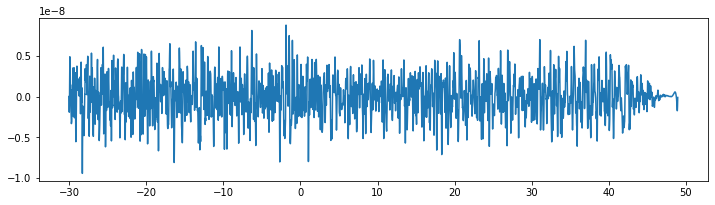

In [34]:
from obspy import read
from obspy.io.sac import SACTrace 
import matplotlib.pyplot as plt
import numpy as np


wtdir="./Download/SAC"
evt = "20220102001614080"
st = read(f"{wtdir}/{evt}/SN.HEL..HHZ.SAC.bp.cut")



d1 = st[0].data

print("length of d1: ", len(d1))

d1 -= d1[0]

print("t(x)", t)
print("d1(y)", d1)
t=[]
t = np.arange(st[0].stats.sac.b, st[0].stats.npts / st[0].stats.sampling_rate + st[0].stats.sac.b, st[0].stats.delta)
if len(t) == (len(d1)+1):
    t = np.delete(t, t[-1])
    
print("length of t: ", len(t))
plt.figure(figsize=(12,3))
plt.plot(t,d1,label="Filtered")

In [26]:
print(st[0].stats.sac.npts)

7893


length of d1:  11958
d10 2.2434099e-08
d10 0.0
length of d1:  11958
length of npts:  11958
length of t:  11958


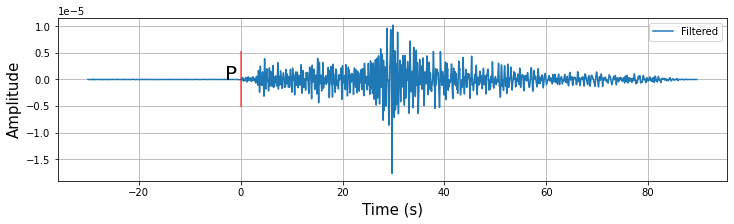

In [27]:
wtdir=f"C:/Users/youzh/Documents/My documents (backed up)/UCSB/XuYang research/sP/SAC"
evt = "20211030230240981"
st = read(f"{wtdir}/{evt}/C1.BO01..BHZ.SAC.bp.cut")

d1 = st[0].data
print("length of d1: ", len(d1))
print("d10", d1[0])
d1 -= d1[0]
print("d10", d1[0])
print("length of d1: ", len(d1))
t = np.arange(st[0].stats.sac.b, st[0].stats.npts / st[0].stats.sampling_rate + st[0].stats.sac.b, st[0].stats.delta)
print("length of npts: ", st[0].stats.npts)
print("length of t: ", len(t))

plt.figure(figsize=(12,3))
plt.plot(t,d1,label="Filtered")
#first-P arrival
plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(d1)*0.5, max(d1)*0.5], color="red", alpha=0.5, linewidth=2)
plt.text(st[0].stats.sac.t1-3, -1*max(d1)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.xlabel("Time (s)",fontsize=15)
plt.grid()

plt.show()

In [8]:
st =obspy.read(f"Download/SAC/20220108062454860/AZ.CRY..BHZ.SAC")
print(st[1].stats)
# model = TauPyModel(model="iasp91")

# sachd=st[0].stats.sac
# distaz = client.distaz(sachd["stla"], sachd["stlo"], sachd["evla"], sachd["evlo"])
# gcarc = distaz['distance']
# arrivals = model.get_travel_times(source_depth_in_km=sachd["evdp"],
#                                   distance_in_degree=gcarc, phase_list=["ttp"])

IndexError: list index out of range

In [23]:
st =obspy.read(f"Download/SAC/20220108062131650/AZ.CRY..BHN.SAC")
print(st)
model = TauPyModel(model="iasp91")

sachd=st[0].stats.sac
distaz = client.distaz(sachd["stla"], sachd["stlo"], sachd["evla"], sachd["evlo"])
gcarc = distaz['distance']
arrivals = model.get_travel_times(source_depth_in_km=sachd["evdp"],
                                  distance_in_degree=gcarc, phase_list=["ttp"])
print(arrivals)

1 Trace(s) in Stream:
AZ.CRY..BHN | 2022-01-08T06:20:31.644499Z - 2022-01-08T06:23:31.654499Z | 100.0 Hz, 18002 samples
7 arrivals
	P phase arrival at 35.729 seconds
	Pn phase arrival at 35.729 seconds
	P phase arrival at 38.235 seconds
	P phase arrival at 38.643 seconds
	P phase arrival at 39.616 seconds
	P phase arrival at 40.102 seconds
	PKiKP phase arrival at 994.306 seconds


In [29]:
client = Client("SCEDC")
starttime = UTCDateTime("2022-01-01")
endtime = UTCDateTime("2022-07-01")
inventory = client.get_stations(network="CI", station="AGM",channel="BHE",
                                starttime=starttime,
                                endtime=endtime)
print(inventory)  


AttributeError: 'Client' object has no attribute 'get_stations'

In [48]:
st = obspy.read(f"./Download/SAC/20220102001614080/AZ.LVA2*.SAC")
# * loads all the traces into the stream
print(st)

3 Trace(s) in Stream:
AZ.LVA2..BHE | 2022-01-02T00:15:14.071703Z - 2022-01-02T00:18:14.081703Z | 100.0 Hz, 18002 samples
AZ.LVA2..BHN | 2022-01-02T00:15:14.071703Z - 2022-01-02T00:18:14.081703Z | 100.0 Hz, 18002 samples
AZ.LVA2..BHZ | 2022-01-02T00:15:14.071703Z - 2022-01-02T00:18:14.081703Z | 100.0 Hz, 18002 samples


In [35]:
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient
from obspy import UTCDateTime

# specify webservice
client = Client("SCEDC")
inv1 = client.get_stations(
    starttime=starttime, endtime=endtime,
    network="CI", sta="AGO", loc="", channel= "EHN",  level="response")
print(inv1)

FDSNNoDataException: No data available for request.
HTTP Status code: 204
Detailed response of server:



In [32]:
inv1.write("CI.AGM.xml", format="stationxml", validate=True)


In [13]:
inv2 = client.get_stations(
    starttime=starttime, endtime=endtime,
    network="CI", sta="FMO", loc="", channel= "BHE,BHN,BHZ",  level="response")
print(inv2)
inv2.write("CI.FMO.xml", format="stationxml", validate=True)

Inventory created at 2022-07-14T16:45:28.000000Z
	Created by: SCEDC WEB SERVICE: fdsnws-station | version: 1.1
		    http://service.scedc.caltech.edu/fdsnws/station/1/query?net=CI&sta=...
	Sending institution: SCEDC (SCEDC)
	Contains:
		Networks (1):
			CI
		Stations (1):
			CI.FMO (Fillmore)
		Channels (3):
			CI.FMO..BHZ, CI.FMO..BHN, CI.FMO..BHE


In [14]:
inv2 = client.get_stations(
    starttime=starttime, endtime=endtime,
    network="CI", sta="PGA", loc="", channel= "BHE,BHN,BHZ",  level="response")
print(inv2)
inv2.write("CI.PGA.xml", format="stationxml", validate=True)

Inventory created at 2022-07-14T16:45:30.000000Z
	Created by: SCEDC WEB SERVICE: fdsnws-station | version: 1.1
		    http://service.scedc.caltech.edu/fdsnws/station/1/query?net=CI&sta=...
	Sending institution: SCEDC (SCEDC)
	Contains:
		Networks (1):
			CI
		Stations (1):
			CI.PGA (Pechanga)
		Channels (3):
			CI.PGA..BHZ, CI.PGA..BHN, CI.PGA..BHE


In [15]:
inv2 = client.get_stations(
    starttime=starttime, endtime=endtime,
    network="CI", sta="SLM", loc="", channel= "BHE,BHN,BHZ",  level="response")
print(inv2)
inv2.write("CI.SLM.xml", format="stationxml", validate=True)

Inventory created at 2022-07-14T16:45:32.000000Z
	Created by: SCEDC WEB SERVICE: fdsnws-station | version: 1.1
		    http://service.scedc.caltech.edu/fdsnws/station/1/query?net=CI&sta=...
	Sending institution: SCEDC (SCEDC)
	Contains:
		Networks (1):
			CI
		Stations (1):
			CI.SLM (Solemint)
		Channels (3):
			CI.SLM..BHZ, CI.SLM..BHN, CI.SLM..BHE


In [16]:
inv2 = client.get_stations(
    starttime=starttime, endtime=endtime,
    network="CI", sta="WLS2", loc="", channel= "BHE,BHN,BHZ",  level="response")
print(inv2)
inv2.write("CI.WLS2.xml", format="stationxml", validate=True)

Inventory created at 2022-07-14T16:45:33.000000Z
	Created by: SCEDC WEB SERVICE: fdsnws-station | version: 1.1
		    http://service.scedc.caltech.edu/fdsnws/station/1/query?net=CI&sta=...
	Sending institution: SCEDC (SCEDC)
	Contains:
		Networks (1):
			CI
		Stations (1):
			CI.WLS2 (Wilsona 2)
		Channels (3):
			CI.WLS2..BHZ, CI.WLS2..BHN, CI.WLS2..BHE


In [17]:
inv2 = client.get_stations(
    starttime=starttime, endtime=endtime,
    network="CI", sta="GOU", loc="", channel= "BHE,BHN,BHZ",  level="response")
print(inv2)
inv2.write("CI.GOU.xml", format="stationxml", validate=True)

Inventory created at 2022-07-14T16:47:01.000000Z
	Created by: SCEDC WEB SERVICE: fdsnws-station | version: 1.1
		    http://service.scedc.caltech.edu/fdsnws/station/1/query?net=CI&sta=...
	Sending institution: SCEDC (SCEDC)
	Contains:
		Networks (1):
			CI
		Stations (1):
			CI.GOU (Gould)
		Channels (3):
			CI.GOU..BHZ, CI.GOU..BHN, CI.GOU..BHE
